In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import utils
from BayesModel import BFC

In [69]:
device = torch.device("cpu")
net = BFC(features=1, classes=1, hiddens=[20,20], nonlin="ReLU")
# net.freeze()
optimizer = torch.optim.AdamW(net.parameters(), lr=0.01)

In [68]:
def train(*, model, optimer, device, epochs, batch_size=100, enums=5):
    pbar = tqdm(range(epochs))
    for epoch in pbar:
        x = torch.randn(batch_size).view(-1, 1).to(torch.double)
        y = 2*x
        optimer.zero_grad()

        # outs = zeros(enums, x.size(0), )
        # for j in range(enums): 
        #     outs = model(x)
            
        out = model(x)
        print(out.size())
        kl = model.kl_reset() / batch_size
        
        loss = ((out - y)**2).mean() + kl
        loss.backward()
        optimer.step()
        pbar.set_description(f"Total loss: {loss:.4f}, kl_loss: {kl:.4f}")


In [72]:
train(model=net, optimer=optimizer, device=device, epochs=200)

  0%|          | 0/200 [00:00<?, ?it/s]

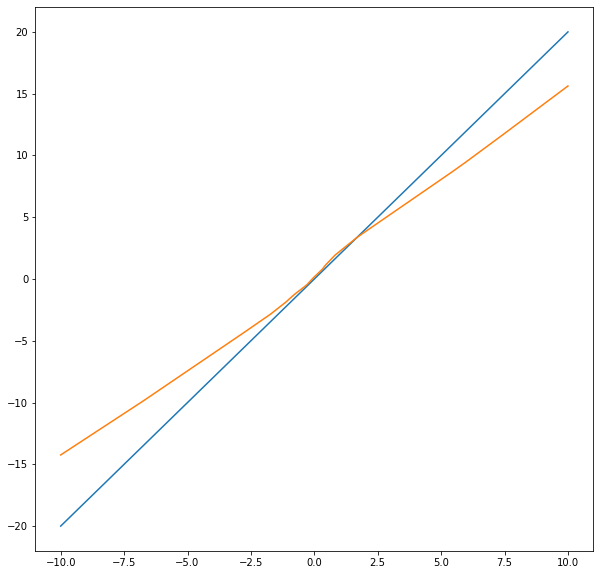

In [76]:
plt.rcParams["figure.figsize"] = (10,10)
x = np.linspace(-10, 10, 1001)[:, None]
d = net(torch.tensor(x)).detach().numpy()
plt.plot(x, 2*x)
plt.plot(x, d)